<center> <h1> <b>BIRDSONGS<b></h1> </center>
<center> <h1>Syllable Tutorial</h1> </center>

# Define Objects

Import package and define matplotlib backend

In [1]:
# the following line enable interact with figures,  
# you can make zoom and save images from a poup matplotlib window
# to select points: qt ipympl tk. To just visualize: notebook
%matplotlib ipympl

import birdsongs as bs
from birdsongs.util import *

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


Define directories path and show audio files

In [2]:
# root_path   = "path_to_repository\\'
# audios_path = "audios_path\\'
# bird_name   = "Zonotrichia capensis"
#audios_path = "/home/saguileran/audios/Colombia/" # "/home/saguileran/audios/zebra-finch/ebird/"
audios_path = "/home/saguileran/audios/South_America/"

paths  = bs.Paths(audios_path=audios_path)              # root_path, audios_path, bird_name
ploter = bs.Ploter(save=True)   # to save figures save=True 
paths.AudioFiles(True)#.head()

The folder has 866 songs:


,ML Catalog Number,Format,Common Name,Scientific Name,Background Species,Recordist,Date,Year,Month,Day,...,Parent Species,eBird Species Code,Taxon Category,Taxonomic Sort,Recordist 2,Average Community Rating,Number of Ratings,Asset Tags,Original Image Height,Original Image Width
0,475928911,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Guy Kirwan,9/16/2016,2016,9,16,...,Zonotrichia capensis,rucspa1,Species,<NA>,<NA>,0.0,0,<NA>,<NA>,<NA>
1,418099511,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Ignacio Escobar Gutirrez,2/5/2020,2020,2,5,...,Zonotrichia capensis,rucspa1,Species,32070,<NA>,0.0,0,<NA>,<NA>,<NA>
2,268256441,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Diego Caiafa,9/14/2005,2005,9,14,...,Zonotrichia capensis,rucspa1,Species,<NA>,<NA>,5.0,1,<NA>,<NA>,<NA>
3,286667,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Peter Boesman,12/28/1994,1994,12,28,...,Zonotrichia capensis,rucspa1,Species,<NA>,<NA>,0.0,0,<NA>,<NA>,<NA>
4,273370,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Tom Schulenberg,5/20/1995,1995,5,20,...,Zonotrichia capensis,rucspa1,Species,<NA>,<NA>,2.0,4,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,279065311,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Selene Torres V.,11/8/2020,2020,11,8,...,Zonotrichia capensis,rucspa1,Species,<NA>,<NA>,3.0,1,<NA>,<NA>,<NA>
862,279065301,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Selene Torres V.,11/8/2020,2020,11,8,...,Zonotrichia capensis,rucspa1,Species,<NA>,<NA>,1.0,1,<NA>,<NA>,<NA>
863,271962181,Audio,Rufous-collared Sparrow,Zonotrichia capensis,Passer domesticus -- House Sparrow,Selene Torres V.,10/17/2020,2020,10,17,...,Zonotrichia capensis,rucspa1,Species,<NA>,<NA>,4.0,1,<NA>,<NA>,<NA>
864,143383,Audio,Rufous-collared Sparrow,Zonotrichia capensis,Rhynchotus rufescens -- Red-winged Tinamou,Kristof Zyskowski,9/18/1995,1995,9,18,...,Zonotrichia capensis,rucspa1,Species,31901,<NA>,3.0,4,<NA>,<NA>,<NA>


In [13]:
paths.AudioFiles(True)[paths.AudioFiles(True)['Country'] == 'Bolivia']

The folder has 866 songs:
The folder has 866 songs:


,ML Catalog Number,Format,Common Name,Scientific Name,Background Species,Recordist,Date,Year,Month,Day,...,Parent Species,eBird Species Code,Taxon Category,Taxonomic Sort,Recordist 2,Average Community Rating,Number of Ratings,Asset Tags,Original Image Height,Original Image Width
0,475928911,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Guy Kirwan,9/16/2016,2016,9,16,...,Zonotrichia capensis,rucspa1,Species,<NA>,<NA>,0.0,0,<NA>,<NA>,<NA>
1,418099511,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Ignacio Escobar Gutirrez,2/5/2020,2020,2,5,...,Zonotrichia capensis,rucspa1,Species,32070,<NA>,0.0,0,<NA>,<NA>,<NA>
2,268256441,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Diego Caiafa,9/14/2005,2005,9,14,...,Zonotrichia capensis,rucspa1,Species,<NA>,<NA>,5.0,1,<NA>,<NA>,<NA>
3,286667,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Peter Boesman,12/28/1994,1994,12,28,...,Zonotrichia capensis,rucspa1,Species,<NA>,<NA>,0.0,0,<NA>,<NA>,<NA>
4,273370,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Tom Schulenberg,5/20/1995,1995,5,20,...,Zonotrichia capensis,rucspa1,Species,<NA>,<NA>,2.0,4,<NA>,<NA>,<NA>
5,182834711,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Joshua Covill,12/14/2018,2018,12,14,...,Zonotrichia capensis,rucspa1,Species,31901,<NA>,5.0,1,<NA>,<NA>,<NA>
6,182135711,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Joshua Covill,12/25/2018,2018,12,25,...,Zonotrichia capensis,rucspa1,Species,31901,<NA>,5.0,1,<NA>,<NA>,<NA>
7,182134871,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Joshua Covill,12/22/2018,2018,12,22,...,Zonotrichia capensis,rucspa1,Species,31901,<NA>,3.0,1,<NA>,<NA>,<NA>
8,170635161,Audio,Rufous-collared Sparrow (Rufous-collared),Zonotrichia capensis [capensis Group],<NA>,Jay McGowan,6/24/2019,2019,6,24,...,Zonotrichia capensis,rucspa6,Group,31902,<NA>,4.0,1,<NA>,<NA>,<NA>
9,139500421,Audio,Rufous-collared Sparrow,Zonotrichia capensis,<NA>,Daniel Lane,1/20/2019,2019,1,20,...,Zonotrichia capensis,rucspa1,Species,31901,<NA>,3.0,1,<NA>,<NA>,<NA>


In [54]:
#paths.AudioFiles()[paths.AudioFiles()["ML Catalog Number"]==int(505734571)]

In [4]:
#paths.AudioFiles().loc[paths.AudioFiles()['Country'] == 'Argentina']

Define, visualize and hear birdsong. The same funcion allow to us select the time of interest enabling SelectTime_on option

/home/saguileran/miniconda3/lib/python3.8/site-packages/birdsongs-0.1b0-py3.8.egg/birdsongs/ploter.py:108: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.


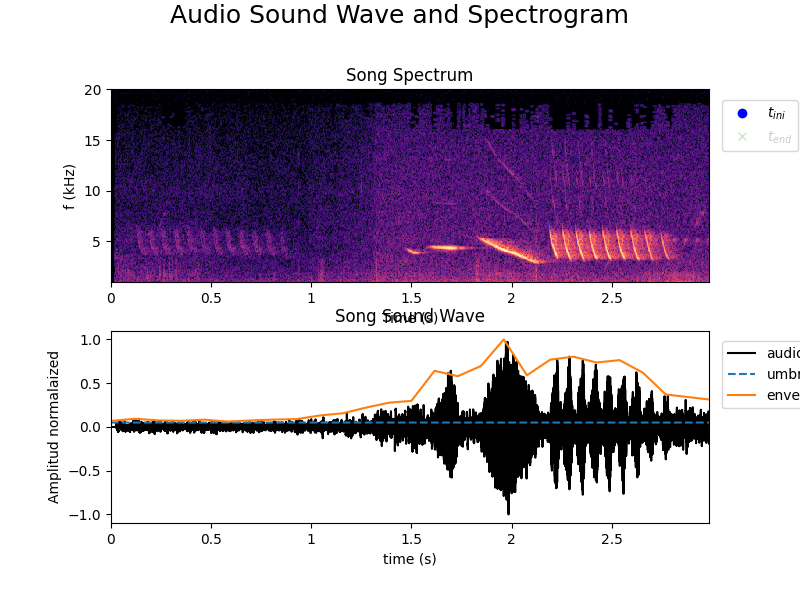

In [134]:
birdsong = bs.BirdSong(paths, no_file=69, NN=512, flim=(1e3,20e3), tlim=(0.,3),
                     Nt=5000)
ploter.Plot(birdsong, FF_on=False, SelectTime_on=True)
AudioPlay(birdsong)

In [135]:
time_interval = Positions(ploter.klicker)[0]
#time_interval = np.array([11.81666416, 12.11719962])
print("Time interval selected: initial time {:.4f} s, final time {:.4f} s".format(time_interval[0], time_interval[1]))

Time interval selected: initial time 2.1904 s, final time 2.2322 s


/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/home/saguileran/miniconda3/lib/python3.8/site-packages/birdsongs-0.1b0-py3.8.egg/birdsongs/ploter.py:165: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.


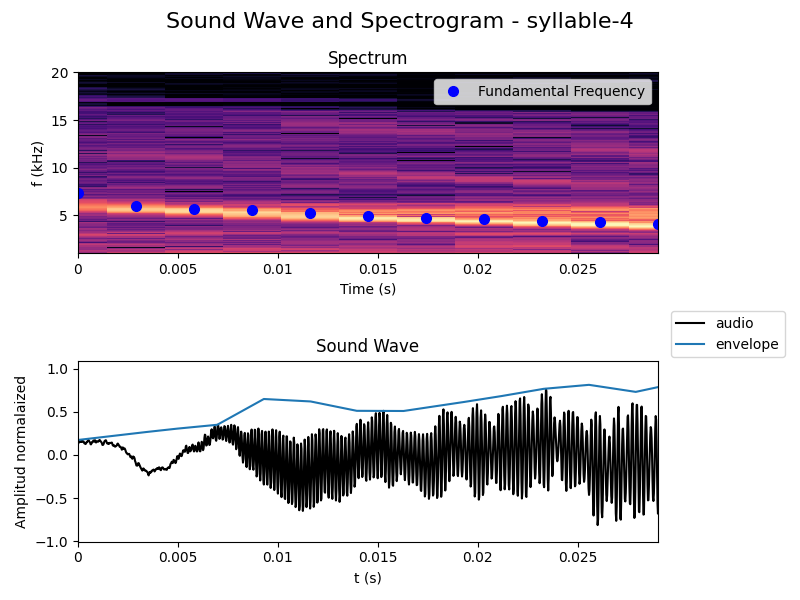

In [136]:
syllable = bs.Syllable(birdsong, tlim=time_interval, umbral_FF=1.05, NN=birdsong.NN, flim=birdsong.flim,
                       no_syllable=4, type="trill")
ploter.Plot(syllable, FF_on=True)
AudioPlay(syllable)

In [137]:
#plt.figure(); plt.plot(syllable.FF, 'o'); plt.show(); plt.ylim((0, 3.5e4));
#syllable.FF

3D plot (in process)

In [138]:
# ploter.Plot3d(birdsong)

In [139]:
# ploter.Plot(birdsong, FF_on=False, syllable=syllable)

Define syllable with the default syllable extractor

In [140]:
# no_syllable    = int(input("Enter the syllable number (1 to {0}): ".format(bird.no_syllables)))
# syllable       = birdsong.Syllable(no_syllable=3)
# ploter.Plot(syllable)
# AudioPlay(syllable)

In [141]:
# ploter.Plot(birdsong, FF_on=False, syllable_on=True, chunck_on=False)

# Optimal Synthetic Syllable

Define optimization method and its parameters 

In [142]:
brute     = {'method':'brute', 'Ns':11}  # , "workers":-1
optimizer = bs.Optimizer(syllable, method_kwargs=brute)
#?lmfit.minimize

Find optimal $\gamma$ for all the syllables computed by the syllables extractor. You can also just find the optimal for the single syllable

In [143]:
# optimal_gamma = optimizer.OptimalGamma(syllable)
optimal_gamma = 37000 # optimizer.AllGammas(birdsong)
syllable.p["gm"].set(value=optimal_gamma)

In [144]:
syllable.p

name,value,initial value,min,max,vary
a0,0.11000000,0.11,0.01000000,0.25000000,False
a1,0.00000000,0.0,-2.00000000,2.00000000,False
a2,0.00000000,0.0,0.00000000,2.00000000,False
b0,-0.10000000,-0.1,-1.00000000,0.50000000,False
b1,1.00000000,1,0.00000000,2.00000000,False
b2,0.00000000,0.0,0.00000000,2.00000000,False
gm,37000.0000,40000.0,10000.0000,100000.000,False


Optimal $\alpha$ and $\beta$

In [145]:
#              [a0, a1, a2, b0, b1, b2]
#syllable.Set([0.154, 0, 0, -0.4, 1, 1.4])
# syllable.p["b2"].set(value=2)

In [146]:
optimizer.OptimalParams(syllable, Ns=11)

As


/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. S

$a_0*$=0.1780, t=1.0414 min
Bs


/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. S

$b_0*$=-0.5500,
b_2*=2.0000, t=10.1412 min


/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. S

$b_1*$=1.0000, t=0.9522 min
end
Time of execution = 12.1348 minutes


/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


Display optimal parameters and generate a synthetic syllable 

In [147]:
Display(syllable.p)
synth_syllable = syllable.Solve(syllable.p)

name,value,initial value,min,max,vary
a0,0.17800000,0.11,0.01000000,0.25000000,False
a1,0.00000000,0.0,-2.00000000,2.00000000,False
a2,0.00000000,0.0,0.00000000,2.00000000,False
b0,-0.55000000,-0.1,-1.00000000,0.50000000,False
b1,1.00000000,1,0.00000000,2.00000000,False
b2,2.00000000,0.0,0.00000000,2.00000000,False
gm,37000.0000,40000.0,10000.0000,100000.000,False


/home/saguileran/miniconda3/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


Visualize and plot the synthetic syllable

/home/saguileran/miniconda3/lib/python3.8/site-packages/birdsongs-0.1b0-py3.8.egg/birdsongs/ploter.py:69: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.


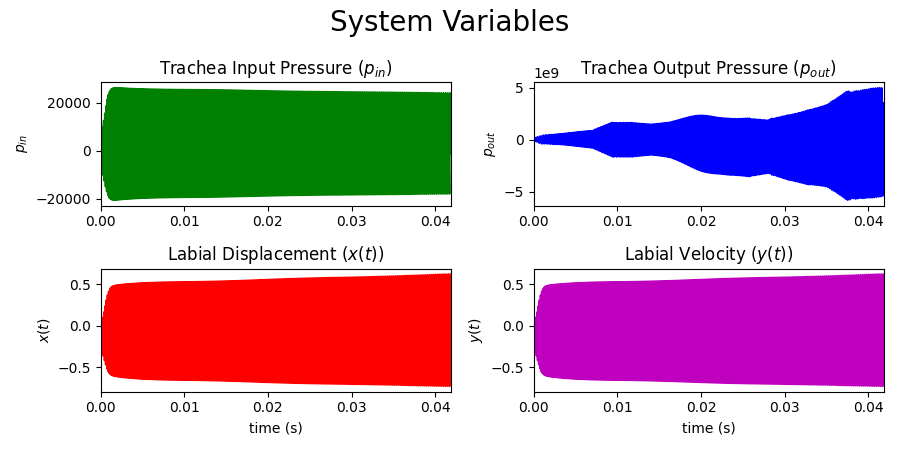

In [148]:
ploter.PlotVs(synth_syllable);

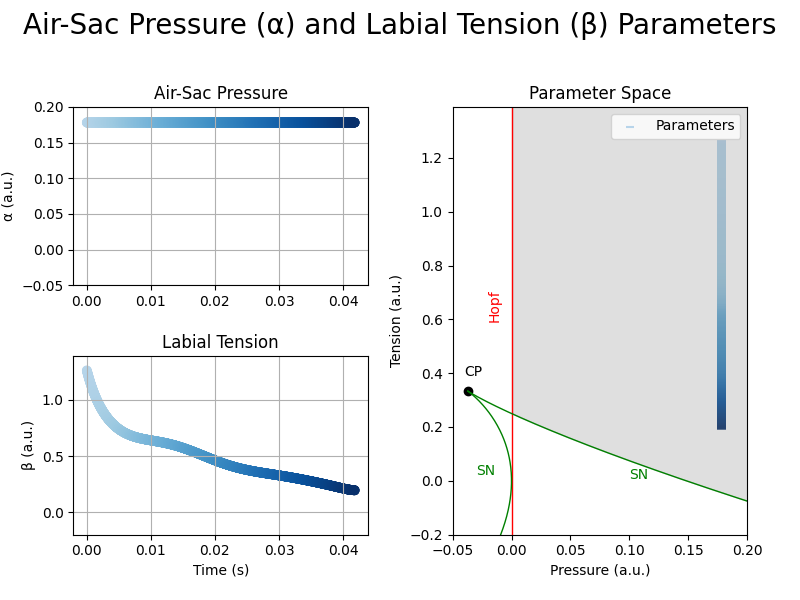

In [149]:
ploter.PlotAlphaBeta(synth_syllable);

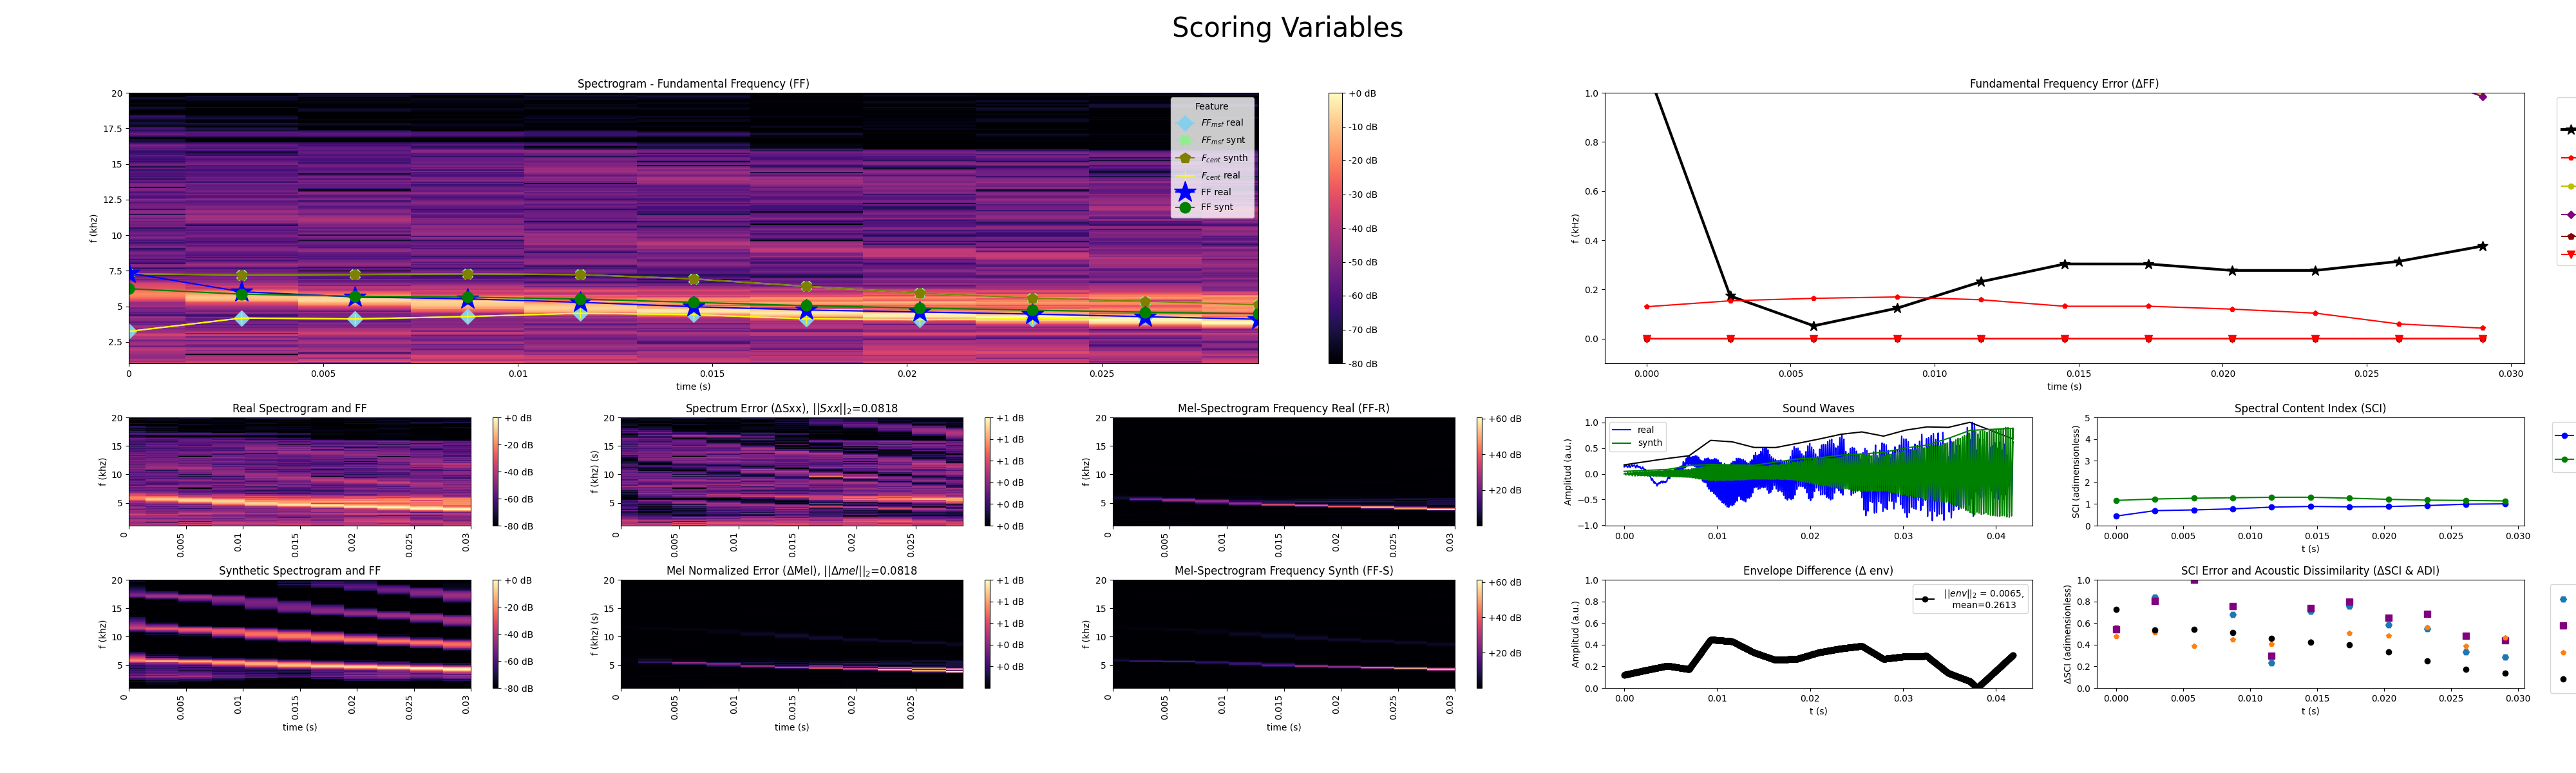

In [150]:
ploter.Result(syllable, synth_syllable);

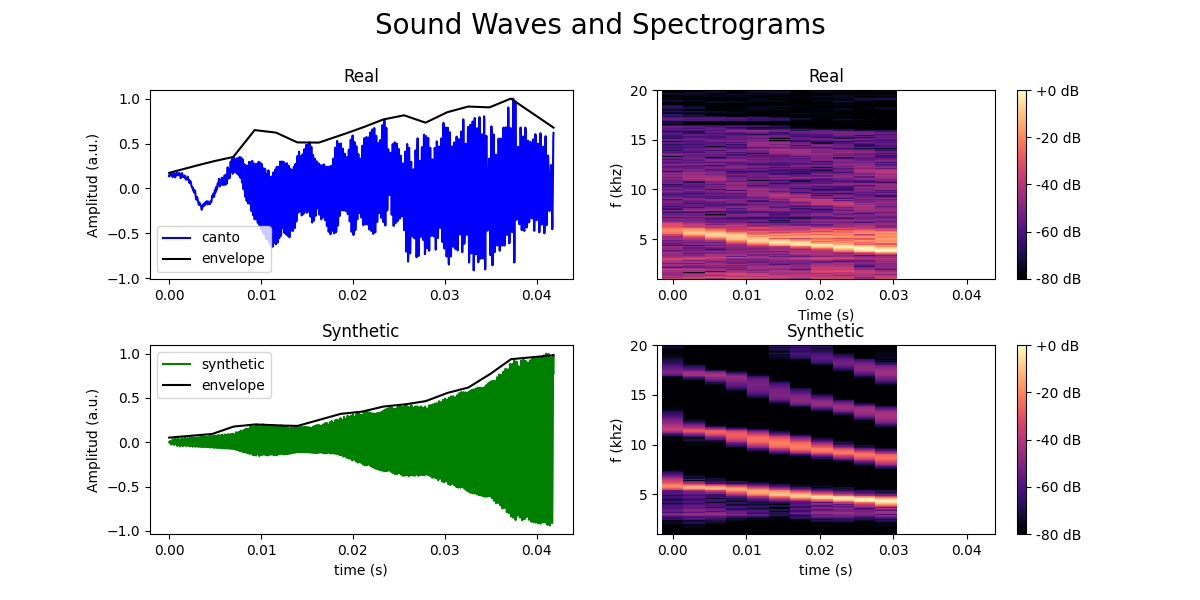

In [151]:
ploter.Syllables(syllable, synth_syllable);

In [152]:
AudioPlay(syllable)

In [153]:
AudioPlay(synth_syllable)

Write synthetic and real syllables

In [154]:
syllable.ExportMotorGestures()
syllable.WriteAudio();  synth_syllable.WriteAudio();

/home/saguileran/miniconda3/lib/python3.8/site-packages/scikit_maad-1.3.12-py3.8.egg/maad/sound/input_output.py:390: UserWarning: Values for bit depth should be 8, 16 or 32. Argument ignored.
  warn('Values for bit depth should be 8, 16 or 32. Argument ignored.')
